<a href="https://colab.research.google.com/github/EmanoelSantosDados/Modelo-de-Clustering/blob/main/Modelo_de_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
%%capture
!pip install sidetable

In [75]:
#Data Wrangling / Bibliotecas para cálculos
import numpy as np
import pandas as pd
import sidetable

#Bibliotecas para vizualização de dados / Gráficos
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

#Bibliotecas para Modelagem / Machine Learning
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.cluster import MiniBatchKMeans, KMeans, DBSCAN, MeanShift
from sklearn.preprocessing import scale, StandardScaler
from yellowbrick.cluster import kelbow_visualizer

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# **Etapa 01 Análise exploratória dos dados**

In [76]:
clientes = pd.read_csv('/content/data.csv', encoding='latin-1')
clientes

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


**A coluna Valor total será criada mais embaixo**

In [77]:
#Valor total
#clientes['Valor_total'] = clientes['UnitPrice'] * clientes['Quantity']  #Criando a coluna Valor total
#clientes

**Vendo por que algumas colunas estão erradas**

In [78]:
clientes.InvoiceNo.sort_values()

,InvoiceNo
0,536365
1,536365
2,536365
3,536365
4,536365
...,...
540449,C581490
541541,C581499
541715,C581568
541716,C581569


## **Análise variáveis categóricas**

In [79]:
clientes[['Description', 'Country']].nunique()  #Qts valores únicos cada uma tem e qts países

,0
Description,4223
Country,38


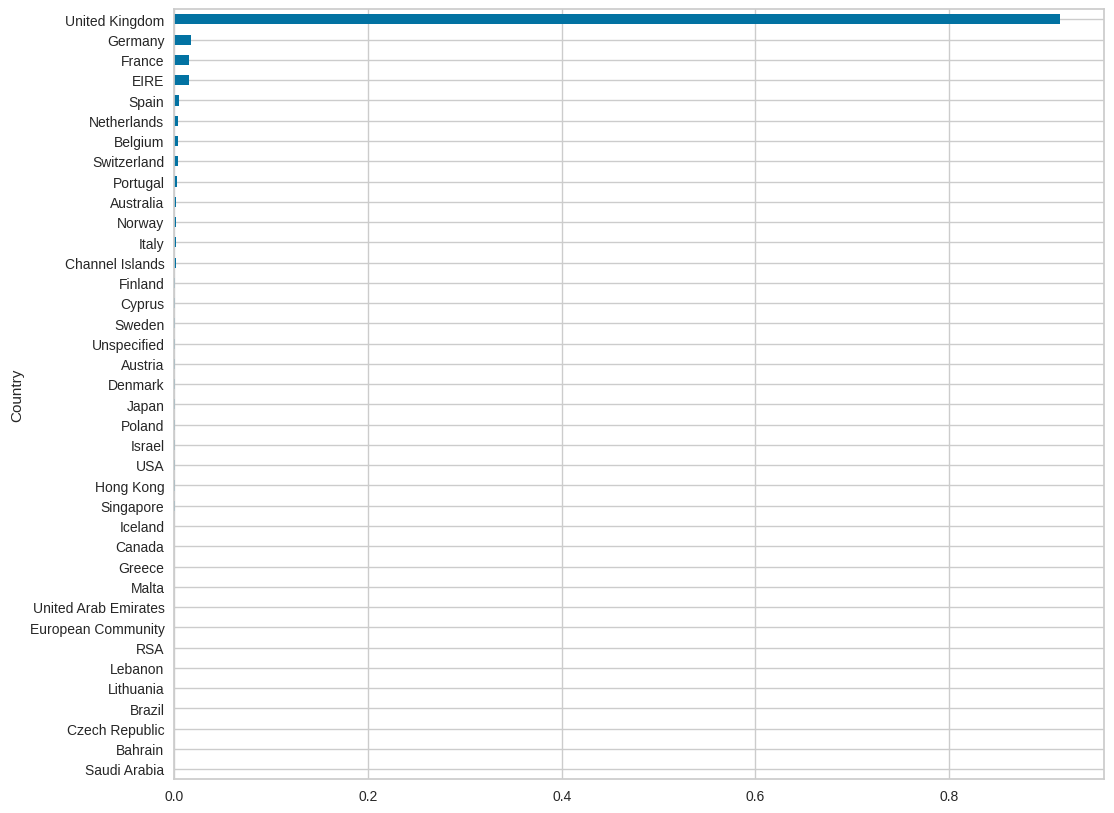

In [80]:
clientes['Country'].value_counts(normalize=True, ascending=True).plot.barh(figsize=(12,10));
#Gráfico de barras

## **Análise variáveis numéricas**

In [81]:
clientes[['Quantity', 'UnitPrice']].describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [82]:
#sidetable
clientes.stb.freq(['Country'])  #Tabela de frequências

#Reino unido concentra o maior volume 91%
#Os treze primeiros 99%
#Os dez primeiros 98%

,Country,count,percent,cumulative_count,cumulative_percent
0,United Kingdom,495478,91.431956,495478,91.431956
1,Germany,9495,1.752139,504973,93.184095
2,France,8557,1.579047,513530,94.763143
3,EIRE,8196,1.512431,521726,96.275574
4,Spain,2533,0.467422,524259,96.742996
5,Netherlands,2371,0.437527,526630,97.180523
6,Belgium,2069,0.381798,528699,97.562321
7,Switzerland,2002,0.369435,530701,97.931756
8,Portugal,1519,0.280305,532220,98.212061
9,Australia,1259,0.232327,533479,98.444388


In [83]:
clientes.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## **Analisando os dados**

In [84]:
print('Quantidade de linhas e colunas respectivamente: ', clientes.shape)
print()

print('Quantidade de dados duplicados: ', clientes.duplicated().sum())
print()

print('Quantidade de linhas duplicadas: ', clientes.duplicated().sum())
print()

print('Verificando se há dados duplicados, qualquer um deles: ', clientes.duplicated().any())
print()

print('Quantidade de dados nulos: ', clientes.isnull().sum().sum())
print()

clientes.info()

Quantidade de linhas e colunas respectivamente:  (541909, 8)

Quantidade de dados duplicados:  5268

Quantidade de linhas duplicadas:  5268

Verificando se há dados duplicados, qualquer um deles:  True

Quantidade de dados nulos:  136534

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [85]:
clientes.isna().sum().sort_values(ascending=False)  #Verificando se há dados duplicados cliente e produto

,0
CustomerID,135080
Description,1454
InvoiceNo,0
StockCode,0
Quantity,0
InvoiceDate,0
UnitPrice,0
Country,0


# **Etapa 02 Pré-processamento dos dados**

## **Data Cleaning**

In [86]:
clientes.stb.missing()  #Verificando se há dados duplicados cliente e produto

,missing,total,percent
CustomerID,135080,541909,24.926694
Description,1454,541909,0.268311
InvoiceNo,0,541909,0.000000
StockCode,0,541909,0.000000
Quantity,0,541909,0.000000
InvoiceDate,0,541909,0.000000
UnitPrice,0,541909,0.000000
Country,0,541909,0.000000


**Nulos**

In [87]:
#Excluindo os dados nulos, não é o ideal, mas nesse caso não temos o que fazer
clientes = clientes.dropna(subset=['CustomerID'])

In [88]:
clientes.stb.missing()  #Verificando se há dados duplicados cliente e produto

,missing,total,percent
InvoiceNo,0,406829,0.0
StockCode,0,406829,0.0
Description,0,406829,0.0
Quantity,0,406829,0.0
InvoiceDate,0,406829,0.0
UnitPrice,0,406829,0.0
CustomerID,0,406829,0.0
Country,0,406829,0.0


**Formato da hora**

Pode ser feito dos dois jeitos, porém, o segundo foi mais rápido.

In [89]:
pd.to_datetime(clientes.InvoiceDate, format='%m/%d/%Y %H:%M')


,InvoiceDate
0,2010-12-01 08:26:00
1,2010-12-01 08:26:00
2,2010-12-01 08:26:00
3,2010-12-01 08:26:00
4,2010-12-01 08:26:00
...,...
541904,2011-12-09 12:50:00
541905,2011-12-09 12:50:00
541906,2011-12-09 12:50:00
541907,2011-12-09 12:50:00


In [90]:
clientes = clientes.copy()

In [91]:
clientes['InvoiceDate'] = pd.to_datetime(clientes.InvoiceDate, format='%m/%d/%Y %H:%M')  #Convertendo InvoiceDate para datetimelientes.head()
clientes.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## **Convertendo colunas**

In [92]:
clientes['CustomerID'] = clientes['CustomerID'].fillna(0).astype(int)  #Convertendo CustomerID para inteiro
clientes['Country'] = clientes['Country'].astype('category')           #Convertendo Country para categoria

In [93]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int64         
 7   Country      406829 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 25.2+ MB


In [94]:
clientes.InvoiceDate.agg(['min', 'max'])  #Verificando a data mínima e máxima

,InvoiceDate
min,2010-12-01 08:26:00
max,2011-12-09 12:50:00


In [95]:
clientes.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


## **Tratamento**

In [96]:
#Verificando se há valores negativos, abaixo de zero
zero = clientes[['Quantity', 'UnitPrice']].le(0).any(axis=1)
clientes = clientes[~zero].copy()

In [97]:
clientes

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


## **Outliers**

<Axes: >

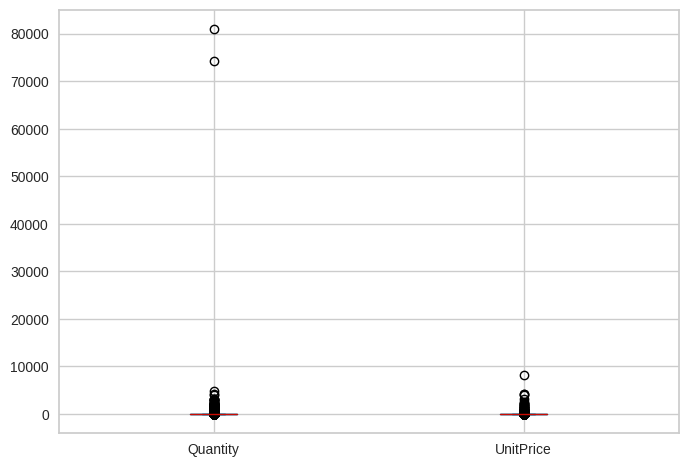

In [98]:
clientes[['Quantity', 'UnitPrice']].plot.box()  #Verificando os outliers

In [99]:
clientes.query('Quantity > 10_000')  #Verificando os outliers / underline só para separar os números

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom


<Axes: >

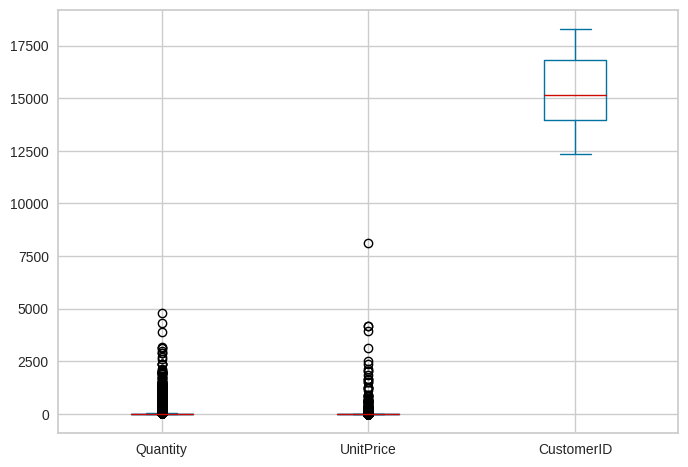

In [100]:
clientes.query('Quantity < 10_000').plot.box()    #Fazendo plot com os que estão abaixo de dez mil

<Axes: >

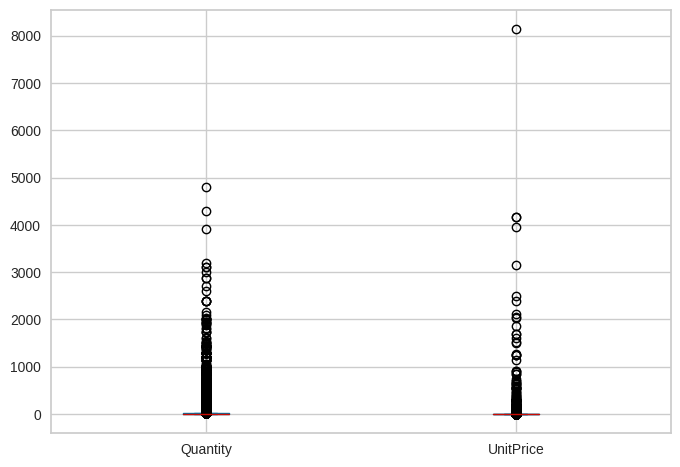

In [101]:
clientes.query('Quantity < 10_000')[['Quantity', 'UnitPrice']].plot.box()
#Fazendo plot com os que estão abaixo de dez mil

In [102]:
clientes.query('UnitPrice>8_000')  #Verificando os outliers

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom


**Removendo esses outliers que estão dispersos.**

**É importante que seja informado ao stakeholders.**

In [103]:
clientes = clientes.query('Quantity<10_000 & UnitPrice<8_000').copy()  #Removendo os outliers

In [104]:
clientes['Price_total'] = clientes.Quantity * clientes.UnitPrice  #Criando a coluna Price_total
clientes

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Price_total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


## **Métrica RFM**

* Recência: quantidade de dias desde o último pedido do cliente.

* Frequência: número total de pedidos feitos pelo cliente.

* Valor Médio por Pedido: ticket médio de compra do cliente.

**R = Recência**

In [105]:
pd.Timestamp.today()    #Pegando a data do dia

Timestamp('2024-09-09 20:47:38.163802')

** R = ('InvoiceDate', lambda x: pd.Timestamp.today() - x.max()) Passando os valores da tupla**

In [106]:
clientes_rfm = (
    clientes.groupby('CustomerID')     #Agrupando pelo ID do cliente
    .agg(                              #Agrupando as colunas
        R = ('InvoiceDate', lambda x: pd.Timestamp.today() - x.max()) #Tupla
    )
)
clientes_rfm

,R
CustomerID,
12347,4660 days 04:55:38.238123
12348,4733 days 07:34:38.241670
12349,4676 days 10:56:38.241960
12350,4968 days 04:46:38.242205
12352,4694 days 06:10:38.242469
...,...
18280,4935 days 10:55:40.740778
18281,4838 days 09:54:40.740951
18282,4665 days 09:04:40.741115


In [107]:
clientes_rfm = (
    clientes.groupby('CustomerID')     #Agrupando pelo ID do cliente
    .agg(                              #Agrupando as colunas
        R = ('InvoiceDate', lambda x: (pd.Timestamp.today() - x.max()).days) #Tupla
    )
)
clientes_rfm

,R
CustomerID,
12347,4660
12348,4733
12349,4676
12350,4968
12352,4694
...,...
18280,4935
18281,4838
18282,4665


**É um dataset antigo, o cliente não ficou esse tempo todo sem comprar, então vamos reduzir as datas para uma data mais próxima da realidade.**

In [108]:
pd.Timestamp('2012-01-01')  #Criando uma data mais próxima da realidade

Timestamp('2012-01-01 00:00:00')

In [109]:
clientes_rfm = (
    clientes.groupby('CustomerID')     #Agrupando pelo ID do cliente
    .agg(                              #Agrupando as colunas
        R = ('InvoiceDate', lambda x: (pd.Timestamp('2012-01-01') - x.max()).days) #Tupla
    )
)
clientes_rfm

,R
CustomerID,
12347,24
12348,97
12349,40
12350,332
12352,58
...,...
18280,299
18281,202
18282,29


**F = Frequência**

**Quantidade de pedidos que o cliente fez independente da quantidade de itens**

In [110]:
clientes_rfm = (
    clientes.groupby('CustomerID')     #Agrupando pelo ID do cliente
    .agg(                              #Agrupando as colunas
        R = ('InvoiceDate', lambda x: (pd.Timestamp('2012-01-01') - x.max()).days), #Tupla
        F = ('InvoiceNo','nunique')    #Qts pedidos únicos ele fez
    )
)
clientes_rfm

,R,F
CustomerID,,
12347,24,7
12348,97,4
12349,40,1
12350,332,1
12352,58,8
...,...,...
18280,299,1
18281,202,1
18282,29,2


**M = Média de gastos(Ticket médio) ou total de gastos**

**Para essa tarefa vamos utilizar o ticket médio**

In [111]:
clientes_rfm = (
    clientes.groupby('CustomerID')                                  #Agrupando pelo ID do cliente
    .agg(                                                           #Agrupando as colunas
        R = ('InvoiceDate', lambda x: (pd.Timestamp('2012-01-01') - x.max()).days), #Tupla
        F = ('InvoiceNo','nunique'),                                #Qts pedidos únicos ele fez
        M = ('Price_total','mean')                                  #Média de gastos
    )
)
clientes_rfm

,R,F,M
CustomerID,,,
12347,24,7,23.681319
12348,97,4,57.975484
12349,40,1,24.076027
12350,332,1,19.670588
12352,58,8,29.482824
...,...,...,...
18280,299,1,18.060000
18281,202,1,11.545714
18282,29,2,14.837500


<Axes: >

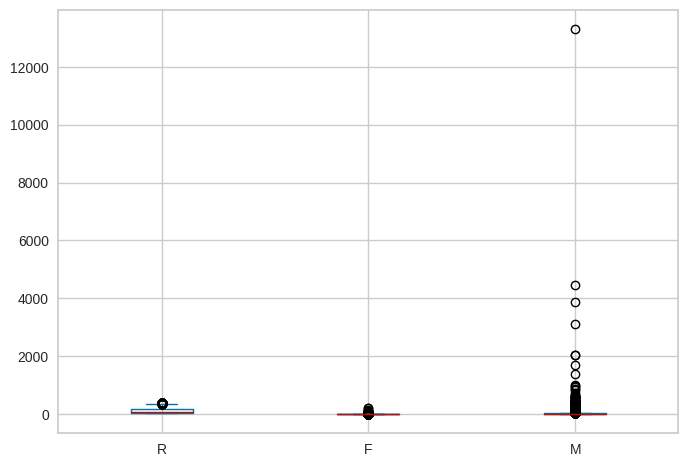

In [112]:
clientes_rfm.plot.box()

<Axes: >

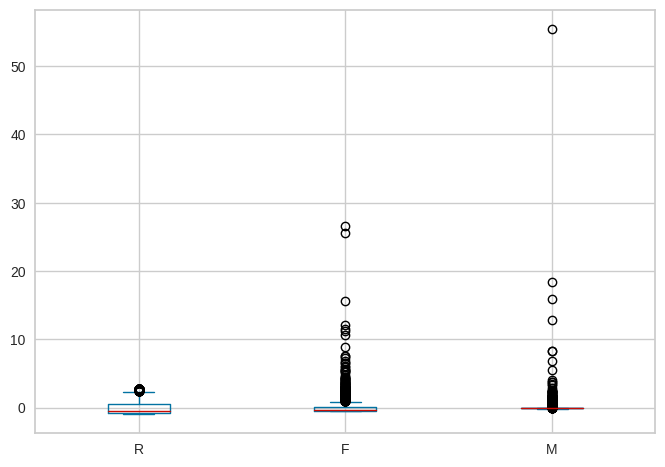

In [113]:
clientes_rfm.apply(scale).plot.box()  #Escalando os dados

Tem cliente com desvio padrão acima de 50%

In [114]:
clientes_rfm.apply(scale).query('M>50')  #Verificando os outliers

,R,F,M
CustomerID,,,
15098,0.899878,-0.165317,55.434876


In [115]:
clientes.query('CustomerID==15098')     #Verificando os outliers

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Price_total
222670,556442,22502,PICNIC BASKET WICKER SMALL,60,2011-06-10 15:22:00,4.95,15098,United Kingdom,297.0
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098,United Kingdom,38970.0
222682,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,2011-06-10 15:33:00,649.50,15098,United Kingdom,649.5


**Dropando esse cliente, desvio padrão está muito alto**

In [116]:
clientes_rfm = clientes_rfm.drop(15098)  #Dropando o cliente

<Axes: >

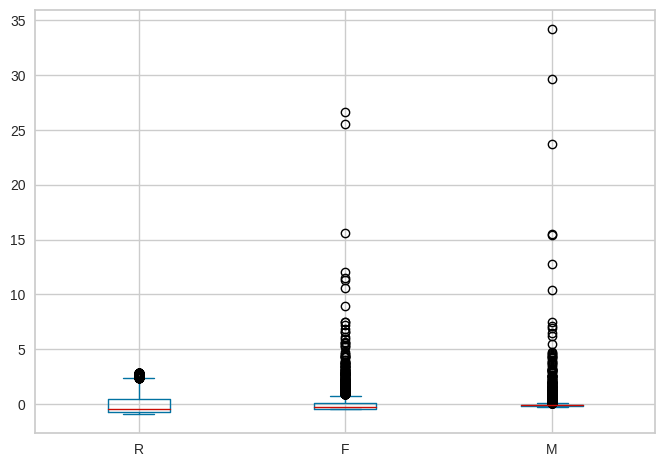

In [117]:
clientes_rfm.apply(scale).plot.box()  #Escalando os dados

**Outliers continua alto, vamos diminuir, não vamos ignorar, nem remover,  apenas diminuir.**

## **Normalização com sklearn**

In [118]:
from sklearn.preprocessing import PowerTransformer  #Normalização

In [119]:
scaler = PowerTransformer()  #Criando o objeto

In [120]:
scaler.fit_transform(clientes_rfm)  #Transformando os dados / Retorna um array

array([[-1.56321942,  1.20186625,  0.40783618],
       [ 0.32346973,  0.66067031,  1.32930367],
       [-0.80913429, -1.15807044,  0.42682878],
       ...,
       [-1.27504611, -0.19570717, -0.16100728],
       [-1.50018116,  1.75030167, -2.60637976],
       [-0.18136318,  0.32722523,  0.52477811]])

In [121]:
#Transformando os dados
clientes_rfm_scaled = pd.DataFrame(scaler.fit_transform(clientes_rfm), index=clientes_rfm.index, columns=clientes_rfm.columns)  #Transformando os dados
clientes_rfm_scaled

,R,F,M
CustomerID,,,
12347,-1.563219,1.201866,0.407836
12348,0.323470,0.660670,1.329304
12349,-0.809134,-1.158070,0.426829
12350,1.568467,-1.158070,0.189376
12352,-0.307718,1.309671,0.653411
...,...,...,...
18280,1.475652,-1.158070,0.085562
18281,1.107356,-1.158070,-0.491003
18282,-1.275046,-0.195707,-0.161007


**Padronizado, aproximou a distribuição de uma distribuição normal e deixou as médias em zeros e padrão em hum.**

<Axes: >

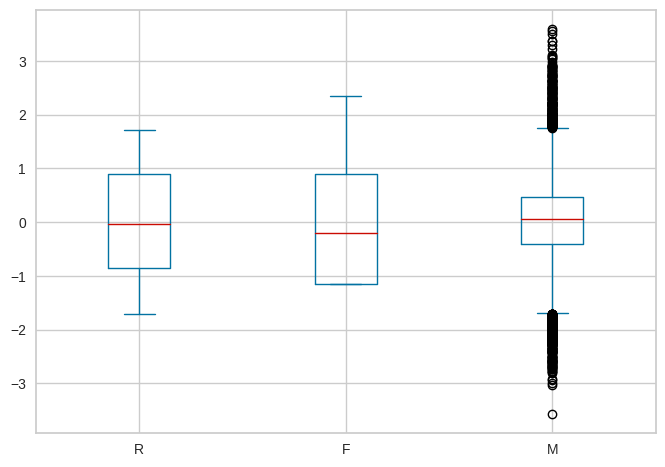

In [122]:
clientes_rfm_scaled.plot.box()  #Escalando os dados

**Caso queira transformar de volta.**

In [123]:
#scaler.inverse_transform(clientes_rfm_scaled)

**Pelo describe podemos analisar que os outliers ainda estão altos:**

**Até 50% dos dados: 72.000000 /	2.000000 /	17.715999**

**Até 75% dos dados: 163.250000 /	5.000000 /	24.843993**

**Máximo: 395.000000	/ 209.000000	/ 4453.430000**

In [124]:
clientes_rfm.describe()

,R,F,M
count,4336.000000,4336.000000,4336.000000
mean,114.032288,4.272601,34.554185
std,99.968352,7.697927,129.202663
min,22.000000,1.000000,1.450000
25%,39.000000,1.000000,12.339095
50%,72.000000,2.000000,17.715999
75%,163.250000,5.000000,24.843993
max,395.000000,209.000000,4453.430000


In [125]:
clientes_rfm.apply(lambda x: x.clip(upper=x.quantile(.95))).describe()  #Limpando os outliers

,R,F,M
count,4336.000000,4336.000000,4336.000000
mean,112.248155,3.608164,23.634656
std,95.504576,3.358999,20.993635
min,22.000000,1.000000,1.450000
25%,39.000000,1.000000,12.339095
50%,72.000000,2.000000,17.715999
75%,163.250000,5.000000,24.843993
max,333.000000,13.000000,91.768421


**Pelo describe podemos analisar que os outliers caíram bastante:**

**Até 50% dos dados: 72.000000 /	2.000000	/ 17.715999**

**Até 75% dos dados: 163.250000	/ 5.000000	/ 24.843993**

**Máximo: 333.000000	/ 13.000000	/ 91.768421**

In [126]:
#Renomeando para saber que fizemos um clip
clientes_rfm_clip = clientes_rfm.apply(lambda x: x.clip(upper=x.quantile(.95)))
clientes_rfm_clip.describe()

,R,F,M
count,4336.000000,4336.000000,4336.000000
mean,112.248155,3.608164,23.634656
std,95.504576,3.358999,20.993635
min,22.000000,1.000000,1.450000
25%,39.000000,1.000000,12.339095
50%,72.000000,2.000000,17.715999
75%,163.250000,5.000000,24.843993
max,333.000000,13.000000,91.768421


In [127]:
clientes_rfm_clip_scaled = clientes_rfm_clip.apply(scale)    #Escalando os dados

# **Etapa 03 Selecione um algoritmo de clusterização**

## **K-Means**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

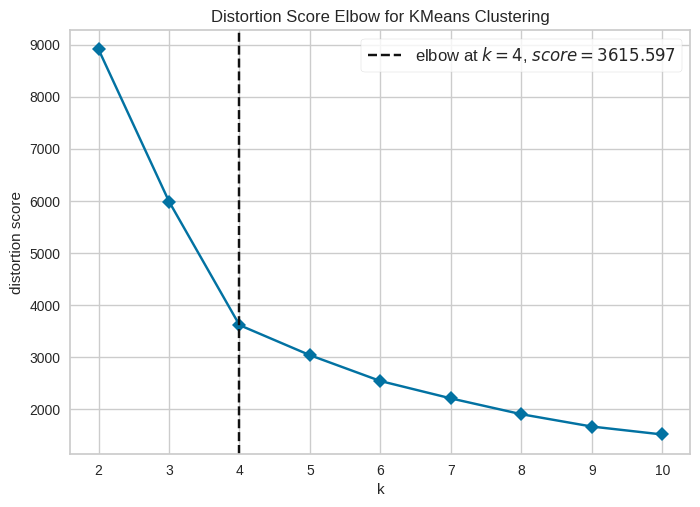

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=10), timings=False)

In [128]:
kelbow_visualizer(KMeans(), clientes_rfm_clip_scaled, k=10, timings=False)  #Plotando o elbow

In [129]:
cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score  #Criando uma lista com as métricas
cluster_metrics_results = []                                                       #Criando uma lista vazia

X = clientes_rfm_clip_scaled.copy()                                                #Criando uma cópia dos dados

for k in range(2,11):                                                              #Loop para rodar os modelos
    model = KMeans(n_clusters=k)                                   #Criando o modelo
    labels = model.fit_predict(X)                                                  #Treinando o modelo
    cluster_results_dict = {'K': k}                                                #Criando um dicionário para armazenar os resultados
    cluster_results_dict['inertia'] = model.inertia_                               #Adicionando a métrica inertia no dicionário
    for metric in cluster_metrics:                                                 #Loop para rodar as métricas
        cluster_results_dict[metric.__name__] = metric(X, labels)                  #Adicionando as métricas no dicionário
    cluster_metrics_results.append(cluster_results_dict)                           #Adicionando o dicionário na lista

pd.DataFrame(cluster_metrics_results).set_index('K').style.background_gradient()   #Criando um dataframe com os resultados

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
K,,,,
2,8906.589803,0.382311,1.065369,1995.770793
3,5987.851314,0.435425,0.857465,2540.001635
4,3615.606659,0.479553,0.704462,3751.144746
5,3038.336417,0.484900,0.737632,3552.816991
6,2542.495810,0.398095,0.851343,3564.657449
7,2209.185328,0.376864,0.870175,3526.795460
8,1905.647286,0.383621,0.870313,3602.149321
9,1668.816796,0.393975,0.801429,3675.107257
10,1516.600786,0.351668,0.887605,3642.047798


**Vamos utilizar 4**

In [130]:
kmeans = KMeans(4)                                            #Criando o modelo
kmeans_labels = kmeans.fit_predict(clientes_rfm_clip_scaled)  #Treinando o modelo

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



### **Modelo 3D**

In [131]:
px.scatter_3d(clientes_rfm_clip, x='R', y='F', z='M', color=kmeans_labels.astype(str), template='plotly_dark')  #Plotando o modelo 3D
#clientes_rfm_clip / Utilizando as tabelas originais
#color=kmeans_labels / Gera uma barra lateral de cor
#color=kmeans_labels.astype(str) / Uma string

**Grupo vermelho tem um ticket médio muito alto, os outros não tem um médio tão alto.**

## **Hierarquia**

In [132]:
!pip install scikit-learn                             #Instalando a biblioteca
from sklearn.cluster import AgglomerativeClustering   #Importando a biblioteca
import yellowbrick                                    #Instalando a biblioteca

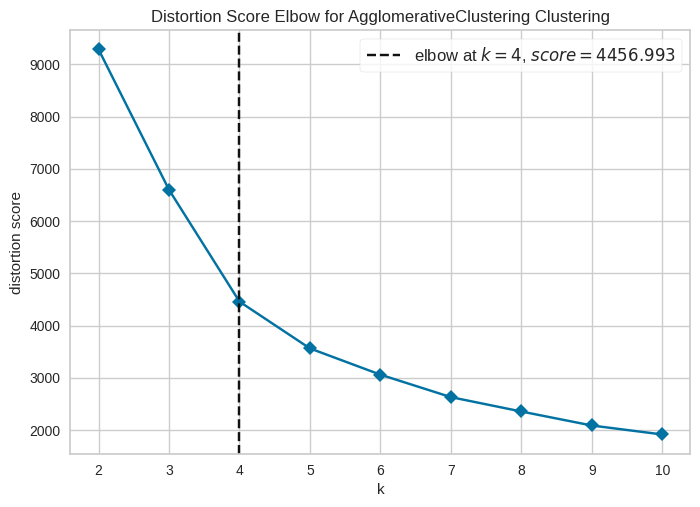

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=AgglomerativeClustering(n_clusters=10),
                 timings=False)

In [133]:
kelbow_visualizer(AgglomerativeClustering(), clientes_rfm_clip_scaled, k=10, timings=False)  #Plotando o elbow

In [134]:
cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score  #Criando uma lista com as métricas
cluster_metrics_results = []                                                       #Criando uma lista vazia

X = clientes_rfm_clip_scaled.copy()                                                #Criando uma cópia dos dados

for k in range(2,11):                                                              #Loop para rodar os modelos
    model = AgglomerativeClustering(n_clusters=k) #Mudamos a função                #Criando o modelo
    labels = model.fit_predict(X)                                                  #Treinando o modelo
    cluster_results_dict = {'K': k}                                                #Criando um dicionário para armazenar os resultados
    #cluster_results_dict['inertia'] = model.inertia_                              #Adicionando a métrica inertia no dicionário
    for metric in cluster_metrics:                                                 #Loop para rodar as métricas
        cluster_results_dict[metric.__name__] = metric(X, labels)                  #Adicionando as métricas no dicionário
    cluster_metrics_results.append(cluster_results_dict)                           #Adicionando o dicionário na lista

pd.DataFrame(cluster_metrics_results).set_index('K').style.background_gradient()   #Criando um dataframe com os resultados

,silhouette_score,davies_bouldin_score,calinski_harabasz_score
K,,,
2,0.361292,1.331666,1737.623791
3,0.398928,0.869855,2104.783905
4,0.431886,0.761966,2770.399918
5,0.342136,0.897329,2872.239315
6,0.348298,0.791909,2816.854970
7,0.322680,0.844326,2848.491623
8,0.287643,0.967432,2799.001327
9,0.286883,0.976982,2832.797336
10,0.298923,0.953087,2786.657350


Retorno:

silhouette_score 0.431886 bem próximo, igual ao KMeans, mesma quantidade de cluster.

davies_bouldin 0.761966	ta sugerindo 4 também.

In [135]:
hclust = AgglomerativeClustering(n_clusters=4)           #Considerando 3 e 4 #Criando o modelo
#hclust = AgglomerativeClustering(n_clusters=3)            #Considerando 3 e 4 #Criando o modelo
hc_labels = hclust.fit_predict(clientes_rfm_clip_scaled)  #Treinando o modelo

In [136]:
px.scatter_3d(clientes_rfm_clip, x='R', y='F', z='M', color=hc_labels.astype(str), template='plotly_dark')  #Plotando o modelo 3D

Em comparação ao KMeans, com 4, ta parecido, porém está mais disperso.

## **Gaussian Mixture**

Essa análise não fez sentido para o meu modelo.

In [137]:
import pandas as pd                           #Importando a biblioteca
from sklearn.mixture import GaussianMixture   #Importando a biblioteca

In [138]:
#results = []                                              #Criando uma lista vazia
#k_range = range(1,9)                                      #Criando uma lista com os valores de k
#covariance_types = ['full', 'tied', 'diag', 'spherical']  #Criando uma lista com os valores de covariance_type
#X = clientes_rfm_clip_scaled.copy()                       #Criando uma cópia dos dados

#for n_components in k_range:                              #Loop para rodar os modelos
 #   for covariance_type in covariance_types:              #Loop para rodar os modelos
  #      mclust = GaussianMixture(n_components=n_components, n_init=10, warm_start=True, covariance_type=covariance_type)  #Criando o modelo
   #     mclust.fit(X)                                     #Treinando o modelo
    #    results.append({                                  #Adicionando os resultados na lista
     #       'bic':mclust.bic(X),                          #Adicionando a métrica bic no dicionário
      #      'n_components':n_components,                  #Adicionando a métrica n_components no dicionário
       #     'covariance_type':covariance_type,            #Adicionando a métrica covariance_type no dicionário
        #})                                                #Adicionando os resultados na lista

#results = pd.DataFrame(results)                           #Criando um dataframe com os resultados
#results.sort_values('bic').head()                       #Ordenando os resultados

Modelo com menor bic foi com 7 componentes

In [139]:
#sns.lineplot(data=results, x='n_components', y='bic', hue='covariance_type');  #Plotando os resultados

### **Testando**

Vamos testar o 5 e o 7

In [140]:
#mclust = GaussianMixture(n_components=7, covariance_type='diag', n_init=10)  #Criando o modelo
#mclust_labels = mclust.fit_predict(clientes_rfm_clip_scaled)                 #Treinando o modelo

In [141]:
#px.scatter_3d(clientes_rfm_clip, x='R', y='F', z='M', color=mclust_labels.astype(str), template='plotly_dark')  #Plotando o modelo 3D

**7 grupos ficou bem confuso**

In [142]:
#mclust = GaussianMixture(n_components=5, covariance_type='diag', n_init=10)  #Criando o modelo
#mclust_labels = mclust.fit_predict(clientes_rfm_clip_scaled)                 #Treinando o modelo

In [143]:
#px.scatter_3d(clientes_rfm_clip, x='R', y='F', z='M', color=mclust_labels.astype(str), template='plotly_dark')  #Plotando o modelo 3D

### **Qual modelo utilizar?**

KMeans pra 4 tá tendo um bom resultado, ticket médio alto.

Hierarquia ta um pouco confuso com grupo disperso.

Gaussian não ficou uma visualização clara.

# **Etapa 04 Analise os clusters obtidos**

In [144]:
#Criando um dataframe com os centróides
centers = pd.DataFrame(kmeans.cluster_centers_, columns=clientes_rfm_clip_scaled.columns)

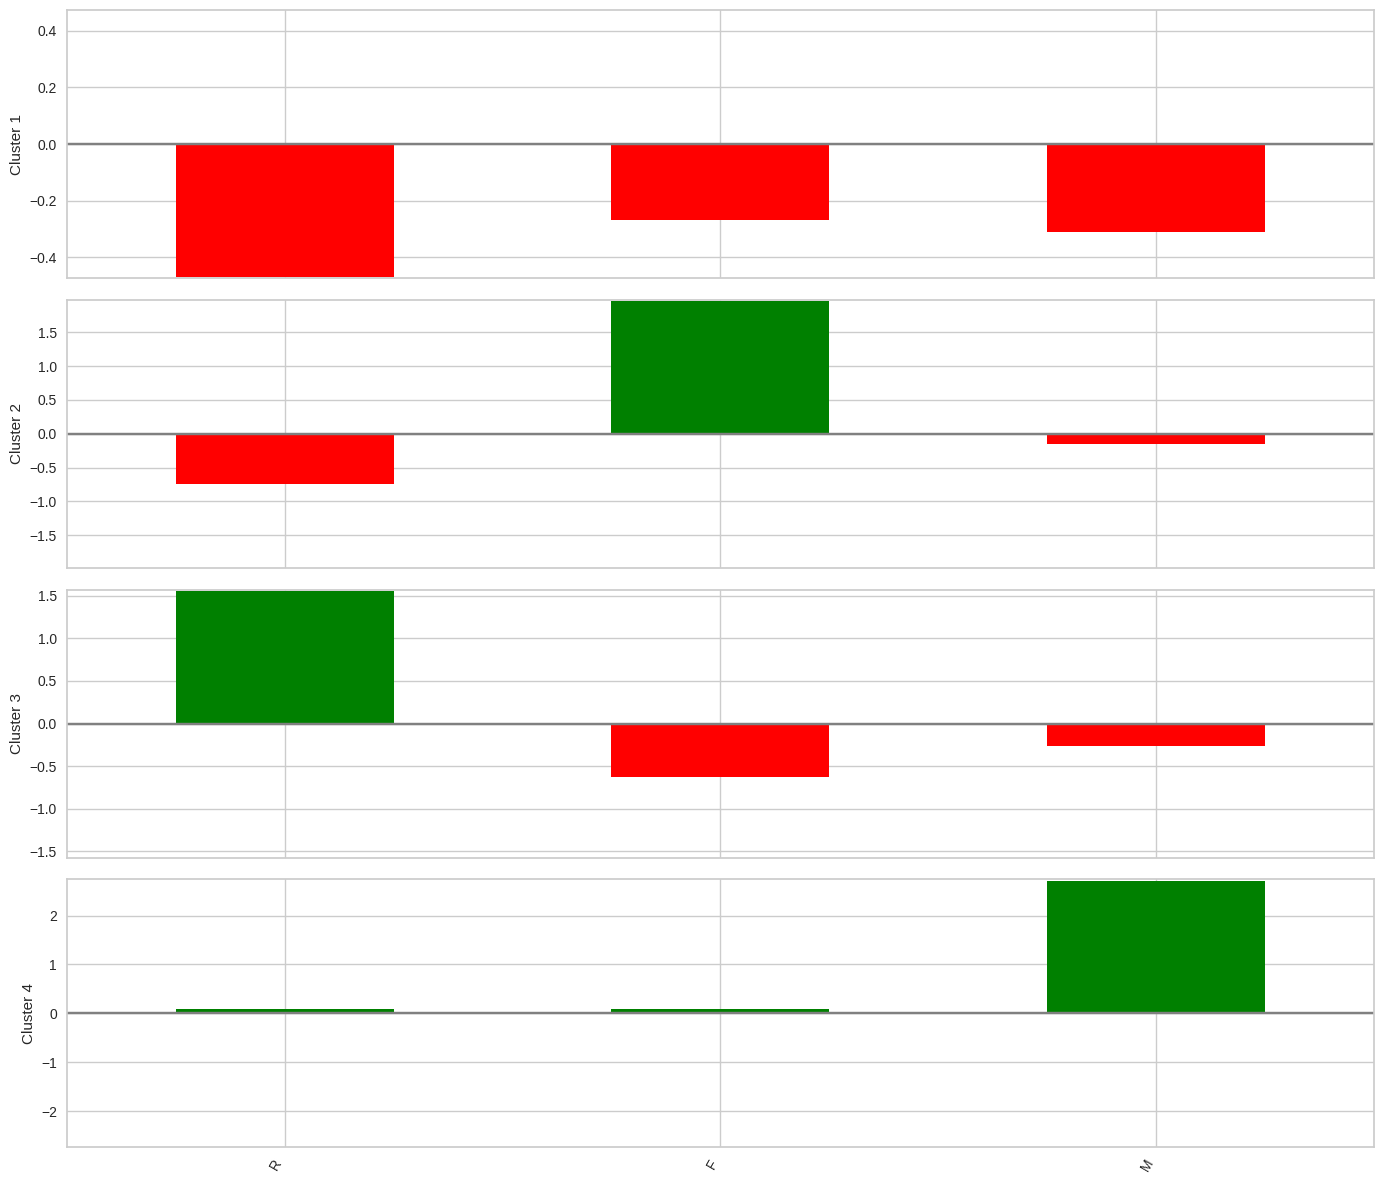

In [145]:
fig,axes = plt.subplots(nrows=4, figsize=(14,12), sharex=True)

for i, ax in enumerate(axes):                            #Loop para rodar os modelos
  center = centers.loc[i,:]                              #Criando um dataframe com os centróides
  maxPC = 1.01 * center.abs().max()                      #Criando uma variável com o valor máximo
  colors = ['green' if l > 0 else 'red' for l in center]  #Criando uma lista com as cores
  center.plot.bar(ax=ax, color=colors)                   #Plotando os centróides
  ax.set_ylabel(f'Cluster {i+1}')                        #Setando o nome dos eixos
  ax.set_ylim(-maxPC, maxPC)                             #Setando o limite dos eixos
  ax.axhline(color='gray')                               #Plotando a linha horizontal
  ax.xaxis.set_ticks_position('none')                    #Removendo os ticks do eixo x

plt.xticks(rotation=60, ha='right')                      #Setando o nome dos eixos
plt.tight_layout()                                       #Ajustando o layout
plt.show()                                               #Plotando o gráfico

Ticket médio alto é bom

Frequência alta é bom

Recência alta é ruim

### **Analisando a tabela**


In [146]:
(
    clientes_rfm_clip.assign(cluster=kmeans_labels)       #Criando uma coluna com os labels
    .groupby('cluster')                                   #Agrupando por cluster
    .mean()                                               #Calculando a média
    .transpose()                                          #Transpondo a tabela
    .style.background_gradient(cmap='YlOrRd', axis=1)
)

cluster,0,1,2,3
R,67.523221,41.517018,261.082051,121.057935
F,2.703877,10.191248,1.509744,3.876574
M,17.120301,20.426973,18.104189,80.714098


# **Etapa 05 Interpretação dos resultados obtidos**

## **Cluster 0:**

* **Recência:** Olhando pelo gráfico 3D do KMeans, tem uma recência bem variada, porém olhando a média, é muito alta

* **Frequência:** A frequência de pedidos pelo gráfico do KMeans 3D é bem distribuida, porém pela média, não é tão alta.Lembrando que estamos levando em conta só o número de pedidos, não o número de itens e nem a quantidade de itens.

* **Ticket médio:** Tem o tickete médio alto,bem acima dos demais clusters.

**Conclusão:** Caberia uma análise mais aprofundada, não tem uma frequência de compras, e provavelmente compra itens mais caros e/ou em grandes quantidades.

## **Cluster 1:**

* **Recência:** Está alta, segunda maior.

* **Frequência:** Frequência razoável, nem alta, nem baixa.

* **Ticket médio:** Menor tickt médio dentre os Clusters analisados.

**Conclusão:** Sua frequência é média, não são clientes de muitas compras mas sempre compram. O valor do ticket médio é o menor porém não está tão distante dos outros com excessão do Cluster 0.

## **Cluster 2:**

* **Recência:** Muito alta, bem acima dos outros Clusters.

* **Frequência:** Não compra com frequência.

* **Ticket médio:** O segundo menor entre os quatro clusters analisados.

**Conclusão:** Tem uma recência absusdamente alta. A sua frequência de compras é bem ruim, a menor entre todos os Clusters. O ticket médio é baixo, segundo menor, são clientes que não compram a muito tempo, possivelmente são clientes Churn.

## **Cluster 3:**

* **Recência:** Recência muito boa, a menor dos clusters

* **Frequência:** Excelente frequência, bem acima dos outros.

* **Ticket médio:** Bom ticket médio, segundo melhor.

**Conclusão:** Se destaca pela frequência alta, bem acima dos demais clusters. A recência é a menor e o ticket médio é o segundo maior, um perfil bem interessante de clientes. Não gasta tanto como o Cluster 0, mas está sempre comprando.